In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import *
from datetime import date, time, datetime 
# %config Completer.use_jedi = False

In [2]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

from math import sqrt

In [3]:
import seaborn as sns
# %matplotlib inline

In [4]:
def parser(x):
    return datetime.strptime(x,"%d/%m/%Y")

In [5]:
campo=pd.read_csv("Volve production data_1.csv",parse_dates=[0], date_parser=parser)

In [6]:
del campo["WELL_BORE_CODE"]
del campo["NPD_WELL_BORE_CODE"]
del campo["NPD_FIELD_CODE"]
del campo["NPD_FIELD_NAME"]
del campo["NPD_FACILITY_CODE"]
del campo["NPD_FACILITY_NAME"]
del campo["AVG_CHOKE_UOM"]

In [7]:
data_tratada=campo[campo.ON_STREAM_HRS>0]

# POZOS PRODUCTORES

In [9]:
df_productores=data_tratada[data_tratada.FLOW_KIND=="production"]
df_productores

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
14,2014-04-21,15/9-F-1 C,11.50,301.376,102.676,204.795,0.000,20.98975,96.580,19.197,69.776,0.00,0.00,0.00,NaN,production,OP
15,2014-04-22,15/9-F-1 C,24.00,289.421,106.353,182.059,0.000,43.34345,107.362,37.939,78.935,631.47,90439.09,0.00,NaN,production,OP
16,2014-04-23,15/9-F-1 C,24.00,270.240,107.644,171.053,NaN,47.16752,99.187,60.757,70.627,1166.46,165720.39,0.00,NaN,production,OP
17,2014-04-24,15/9-F-1 C,24.00,262.843,107.869,168.242,NaN,47.73231,94.601,63.047,66.049,1549.81,221707.31,0.00,NaN,production,OP
18,2014-04-25,15/9-F-1 C,24.00,255.527,107.971,165.539,NaN,48.53377,89.988,64.547,61.405,1248.70,178063.52,0.00,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606,2016-08-22,15/9-F-5,24.00,NaN,NaN,NaN,24.998,100.00000,23.650,57.480,0.120,371.33,57934.84,90.61,NaN,production,OP
15607,2016-08-23,15/9-F-5,24.00,NaN,NaN,NaN,25.074,100.00000,23.728,56.862,0.190,378.55,59119.57,90.11,NaN,production,OP
15608,2016-08-24,15/9-F-5,24.00,NaN,NaN,NaN,24.934,100.00000,23.703,56.249,0.168,376.86,58632.31,91.32,NaN,production,OP
15609,2016-08-25,15/9-F-5,24.00,NaN,NaN,NaN,24.931,100.00000,23.642,57.884,0.102,377.44,59337.43,91.38,NaN,production,OP


In [10]:
del df_productores["BORE_WI_VOL"]

In [11]:
names_prod = pd.unique(df_productores["NPD_WELL_BORE_NAME"])
list(names_prod)

['15/9-F-1 C',
 '15/9-F-11',
 '15/9-F-12',
 '15/9-F-14',
 '15/9-F-15 D',
 '15/9-F-5']

In [12]:
df_well_1=df_productores[df_productores.NPD_WELL_BORE_NAME=="15/9-F-1 C"]
df_well_2=df_productores[df_productores.NPD_WELL_BORE_NAME=="15/9-F-11"]
df_well_3=df_productores[df_productores.NPD_WELL_BORE_NAME=="15/9-F-12"]
df_well_4=df_productores[df_productores.NPD_WELL_BORE_NAME=="15/9-F-14"]
df_well_5=df_productores[df_productores.NPD_WELL_BORE_NAME=="15/9-F-15 D"]
df_well_6=df_productores[df_productores.NPD_WELL_BORE_NAME=="15/9-F-5"]

In [13]:
lista_df_well_prod=[df_well_1,df_well_2,df_well_3,df_well_4,df_well_5,df_well_6]

In [14]:
for name in lista_df_well_prod:
    nulos=name.isnull().values.sum()
    print(nulos)

436
21
31
517
0
387


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## POZO 1

In [16]:
encabezados=["ON_STREAM_HRS","AVG_DOWNHOLE_PRESSURE","AVG_DOWNHOLE_TEMPERATURE","AVG_DP_TUBING","AVG_ANNULUS_PRESS","AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","DP_CHOKE_SIZE","BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL"]
encabezados

['ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL']

In [17]:
df_well_1

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
14,2014-04-21,15/9-F-1 C,11.50,301.376,102.676,204.795,0.0,20.98975,96.580,19.197,69.776,0.00,0.00,0.00,production,OP
15,2014-04-22,15/9-F-1 C,24.00,289.421,106.353,182.059,0.0,43.34345,107.362,37.939,78.935,631.47,90439.09,0.00,production,OP
16,2014-04-23,15/9-F-1 C,24.00,270.240,107.644,171.053,NaN,47.16752,99.187,60.757,70.627,1166.46,165720.39,0.00,production,OP
17,2014-04-24,15/9-F-1 C,24.00,262.843,107.869,168.242,NaN,47.73231,94.601,63.047,66.049,1549.81,221707.31,0.00,production,OP
18,2014-04-25,15/9-F-1 C,24.00,255.527,107.971,165.539,NaN,48.53377,89.988,64.547,61.405,1248.70,178063.52,0.00,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2016-04-02,15/9-F-1 C,24.00,223.012,108.058,196.629,NaN,54.68774,26.383,69.559,10.681,284.72,46880.14,766.23,production,OP
727,2016-04-03,15/9-F-1 C,24.00,221.813,108.044,196.133,NaN,54.72411,25.681,72.502,9.910,280.17,45842.82,748.25,production,OP
728,2016-04-04,15/9-F-1 C,24.00,220.780,108.042,195.665,NaN,55.06795,25.115,71.750,9.197,281.93,45800.83,797.30,production,OP
729,2016-04-05,15/9-F-1 C,24.00,218.752,108.078,193.411,NaN,55.99813,25.341,72.218,9.101,317.38,51990.65,792.76,production,OP


In [18]:
fechas=list(df_well_1.DATEPRD)

In [19]:
df_new=df_well_1.set_index("DATEPRD")

In [20]:
df_new

,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
DATEPRD,,,,,,,,,,,,,,,
2014-04-21,15/9-F-1 C,11.50,301.376,102.676,204.795,0.0,20.98975,96.580,19.197,69.776,0.00,0.00,0.00,production,OP
2014-04-22,15/9-F-1 C,24.00,289.421,106.353,182.059,0.0,43.34345,107.362,37.939,78.935,631.47,90439.09,0.00,production,OP
2014-04-23,15/9-F-1 C,24.00,270.240,107.644,171.053,NaN,47.16752,99.187,60.757,70.627,1166.46,165720.39,0.00,production,OP
2014-04-24,15/9-F-1 C,24.00,262.843,107.869,168.242,NaN,47.73231,94.601,63.047,66.049,1549.81,221707.31,0.00,production,OP
2014-04-25,15/9-F-1 C,24.00,255.527,107.971,165.539,NaN,48.53377,89.988,64.547,61.405,1248.70,178063.52,0.00,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-02,15/9-F-1 C,24.00,223.012,108.058,196.629,NaN,54.68774,26.383,69.559,10.681,284.72,46880.14,766.23,production,OP
2016-04-03,15/9-F-1 C,24.00,221.813,108.044,196.133,NaN,54.72411,25.681,72.502,9.910,280.17,45842.82,748.25,production,OP
2016-04-04,15/9-F-1 C,24.00,220.780,108.042,195.665,NaN,55.06795,25.115,71.750,9.197,281.93,45800.83,797.30,production,OP


In [21]:
parametros=df_well_1.iloc[:,2:14]

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
# AAA
imp=SimpleImputer(strategy="mean")

In [24]:
datos=imp.fit_transform(parametros)

In [25]:
datos

array([[1.1500000e+01, 3.0137600e+02, 1.0267600e+02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.4000000e+01, 2.8942100e+02, 1.0635300e+02, ..., 6.3147000e+02,
        9.0439090e+04, 0.0000000e+00],
       [2.4000000e+01, 2.7024000e+02, 1.0764400e+02, ..., 1.1664600e+03,
        1.6572039e+05, 0.0000000e+00],
       ...,
       [2.4000000e+01, 2.2078000e+02, 1.0804200e+02, ..., 2.8193000e+02,
        4.5800830e+04, 7.9730000e+02],
       [2.4000000e+01, 2.1875200e+02, 1.0807800e+02, ..., 3.1738000e+02,
        5.1990650e+04, 7.9276000e+02],
       [2.0820000e+01, 2.1843800e+02, 1.0785700e+02, ..., 2.0800000e+02,
        3.4998300e+04, 5.4239000e+02]])

In [26]:
df_sin_nan=pd.DataFrame(datos, columns=encabezados)
df_sin_nan.isnull().values.sum()
df_sin_nan

0

In [27]:
df_sin_nan

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,11.50,301.376,102.676,204.795,0.0,20.98975,96.580,19.197,69.776,0.00,0.00,0.00
1,24.00,289.421,106.353,182.059,0.0,43.34345,107.362,37.939,78.935,631.47,90439.09,0.00
2,24.00,270.240,107.644,171.053,0.0,47.16752,99.187,60.757,70.627,1166.46,165720.39,0.00
3,24.00,262.843,107.869,168.242,0.0,47.73231,94.601,63.047,66.049,1549.81,221707.31,0.00
4,24.00,255.527,107.971,165.539,0.0,48.53377,89.988,64.547,61.405,1248.70,178063.52,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
433,24.00,223.012,108.058,196.629,0.0,54.68774,26.383,69.559,10.681,284.72,46880.14,766.23
434,24.00,221.813,108.044,196.133,0.0,54.72411,25.681,72.502,9.910,280.17,45842.82,748.25
435,24.00,220.780,108.042,195.665,0.0,55.06795,25.115,71.750,9.197,281.93,45800.83,797.30
436,24.00,218.752,108.078,193.411,0.0,55.99813,25.341,72.218,9.101,317.38,51990.65,792.76


### limpieza de outliers de la columna AVG_DOWNHOLE_PRESSURE

<AxesSubplot:ylabel='AVG_DOWNHOLE_PRESSURE'>

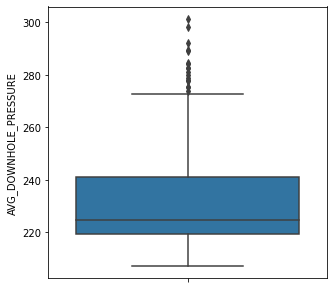

In [28]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'AVG_DOWNHOLE_PRESSURE', data=df_sin_nan)

In [29]:
min_value=df_sin_nan.AVG_DOWNHOLE_PRESSURE.min()
print("min: ",min_value)

max_value=df_sin_nan.AVG_DOWNHOLE_PRESSURE.max()
print("max: ",max_value)

median_value=df_sin_nan.AVG_DOWNHOLE_PRESSURE.median()
print("median: ",median_value)

Q1=df_sin_nan["AVG_DOWNHOLE_PRESSURE"].quantile(0.25)
print("Q1: ",Q1)

Q3=df_sin_nan["AVG_DOWNHOLE_PRESSURE"].quantile(0.75)
print("Q3: ",Q3)

IQR=Q3-Q1
print("IQR: ",IQR)

lower_whisker_p1c1=Q1-0.8*IQR
print("lower whisker: ",lower_whisker_p1c1)

upper_whisker_p1c1=Q3+1.5*IQR
print("upper wiscker: ",upper_whisker_p1c1)




min:  207.219
max:  301.376
median:  224.6395
Q1:  219.51
Q3:  241.23975000000002
IQR:  21.729750000000024
lower whisker:  202.12619999999998
upper wiscker:  273.834375


In [30]:
df_final_downpres=df_sin_nan[df_sin_nan["AVG_DOWNHOLE_PRESSURE"]<upper_whisker_p1c1]
df_final_downpres.shape

(421, 12)

In [31]:
df_final_downpres.AVG_DOWNHOLE_PRESSURE.mean()

229.08447743467934

<AxesSubplot:ylabel='AVG_DOWNHOLE_PRESSURE'>

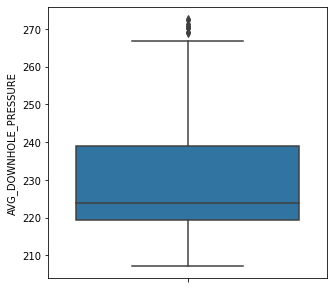

In [32]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'AVG_DOWNHOLE_PRESSURE', data=df_final_downpres)

In [33]:
df_modif_col1=df_sin_nan.AVG_DOWNHOLE_PRESSURE.where(df_sin_nan.AVG_DOWNHOLE_PRESSURE<upper_whisker_p1c1,df_final_downpres.AVG_DOWNHOLE_PRESSURE.median())
df_modif_col1

0      223.935
1      223.935
2      270.240
3      262.843
4      255.527
        ...   
433    223.012
434    221.813
435    220.780
436    218.752
437    218.438
Name: AVG_DOWNHOLE_PRESSURE, Length: 438, dtype: float64

<AxesSubplot:>

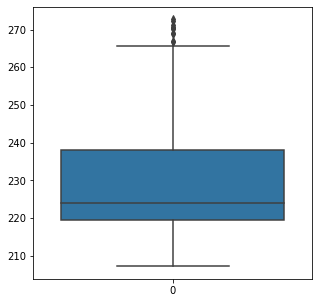

In [34]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(data=df_modif_col1)

### limpieza de outliers de la columna AVG_DOWNHOLE_TEMPERATURE

<AxesSubplot:ylabel='AVG_DOWNHOLE_TEMPERATURE'>

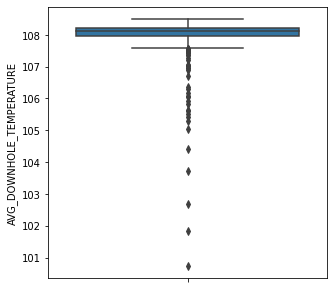

In [35]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'AVG_DOWNHOLE_TEMPERATURE', data=df_sin_nan)

In [36]:
Q1=df_sin_nan["AVG_DOWNHOLE_TEMPERATURE"].quantile(0.25)
Q3=df_sin_nan["AVG_DOWNHOLE_TEMPERATURE"].quantile(0.75)
IQR=Q3-Q1
lower_whisker_p1c2=Q1-1*IQR
upper_whisker_p1c2=Q3+1*IQR
print(lower_whisker_p1c2)
print(upper_whisker_p1c2)

107.70750000000001
108.46875


In [37]:
df_final_downtemp=df_sin_nan[df_sin_nan["AVG_DOWNHOLE_TEMPERATURE"]>lower_whisker_p1c2]
df_final_downtemp.shape

(391, 12)

<AxesSubplot:ylabel='AVG_DOWNHOLE_TEMPERATURE'>

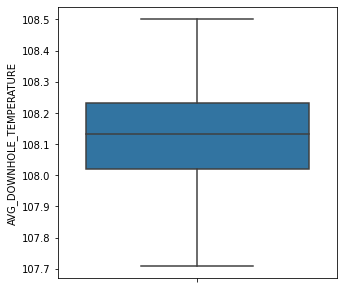

In [38]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'AVG_DOWNHOLE_TEMPERATURE', data=df_final_downtemp)

In [39]:
df_modif_col2=df_sin_nan.AVG_DOWNHOLE_TEMPERATURE.where(df_sin_nan.AVG_DOWNHOLE_TEMPERATURE>lower_whisker_p1c2,df_final_downtemp.AVG_DOWNHOLE_TEMPERATURE.mean())
df_modif_col2

0      108.124327
1      108.124327
2      108.124327
3      107.869000
4      107.971000
          ...    
433    108.058000
434    108.044000
435    108.042000
436    108.078000
437    107.857000
Name: AVG_DOWNHOLE_TEMPERATURE, Length: 438, dtype: float64

<AxesSubplot:>

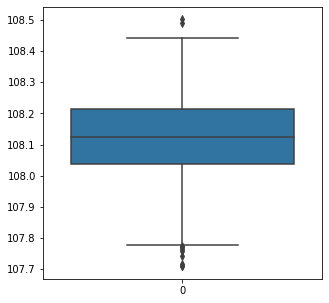

In [40]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(data=df_modif_col2)

### limpieza de outliers de la columna AVG_DP_TUBING

<AxesSubplot:ylabel='AVG_DP_TUBING'>

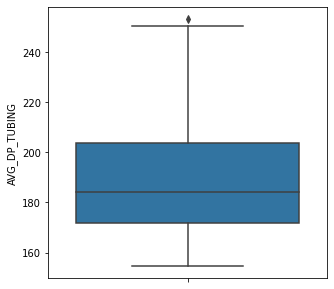

In [41]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'AVG_DP_TUBING', data=df_sin_nan)

In [42]:
Q1=df_sin_nan["AVG_DP_TUBING"].quantile(0.25)
Q3=df_sin_nan["AVG_DP_TUBING"].quantile(0.75)
IQR=Q3-Q1
lower_whisker_p1c3=Q1-1.5*IQR
upper_whisker_p1c3=Q3+1.5*IQR
print(lower_whisker_p1c3)
print(upper_whisker_p1c3)

123.73574999999997
252.04975000000005


In [43]:
df_final_dptubing=df_sin_nan[df_sin_nan["AVG_DP_TUBING"]<upper_whisker_p1c3]
df_final_dptubing.shape

(437, 12)

<AxesSubplot:ylabel='AVG_DP_TUBING'>

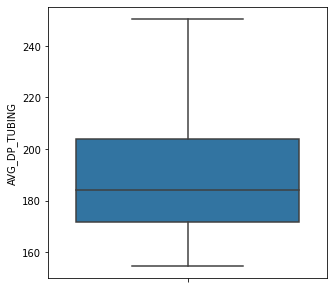

In [44]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'AVG_DP_TUBING', data=df_final_dptubing)

In [45]:
df_modif_col3=df_sin_nan.AVG_DP_TUBING.where(df_sin_nan.AVG_DP_TUBING<upper_whisker_p1c3,df_final_dptubing.AVG_DP_TUBING.mean())
df_modif_col3

0      204.795
1      182.059
2      171.053
3      168.242
4      165.539
        ...   
433    196.629
434    196.133
435    195.665
436    193.411
437    192.830
Name: AVG_DP_TUBING, Length: 438, dtype: float64

### limpieza de outliers de la columna AVG_CHOKE_SIZE_P

<AxesSubplot:ylabel='AVG_CHOKE_SIZE_P'>

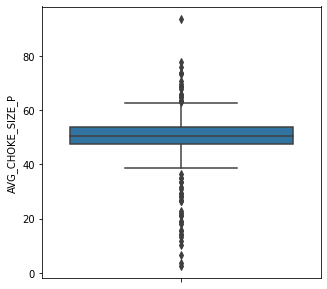

In [46]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'AVG_CHOKE_SIZE_P', data=df_sin_nan)

In [47]:
Q1=df_sin_nan["AVG_CHOKE_SIZE_P"].quantile(0.25)
Q3=df_sin_nan["AVG_CHOKE_SIZE_P"].quantile(0.75)
IQR=Q3-Q1
lower_whisker_p1c5=Q1-1.1*IQR
upper_whisker_p1c5=Q3+1.1*IQR
print(lower_whisker_p1c5)
print(upper_whisker_p1c5)

40.97033025
60.44968225


In [48]:
df_chokesizep=df_sin_nan[df_sin_nan["AVG_CHOKE_SIZE_P"]<upper_whisker_p1c5]
df_chokesizep.shape

(407, 12)

In [49]:
df_final_chokesizep=df_chokesizep[df_chokesizep["AVG_CHOKE_SIZE_P"]>lower_whisker_p1c5]
df_final_chokesizep.shape

(370, 12)

<AxesSubplot:ylabel='AVG_CHOKE_SIZE_P'>

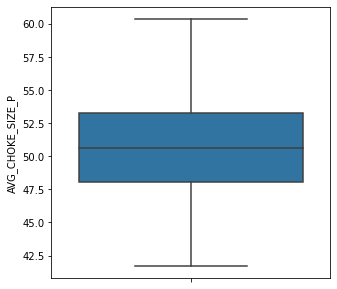

In [50]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'AVG_CHOKE_SIZE_P', data=df_final_chokesizep)

In [51]:
df_modif_col51=df_sin_nan.AVG_CHOKE_SIZE_P.where(df_sin_nan.AVG_CHOKE_SIZE_P>lower_whisker_p1c5,df_final_chokesizep.AVG_CHOKE_SIZE_P.mean())
df_modif_col5=df_modif_col51.where(df_modif_col51<upper_whisker_p1c5,df_final_chokesizep.AVG_CHOKE_SIZE_P.mean())
df_modif_col5

0      50.987051
1      43.343450
2      47.167520
3      47.732310
4      48.533770
         ...    
433    54.687740
434    54.724110
435    55.067950
436    55.998130
437    45.143440
Name: AVG_CHOKE_SIZE_P, Length: 438, dtype: float64

### limpieza de outliers de la columna AVG_WHP_P

<AxesSubplot:ylabel='AVG_WHP_P'>

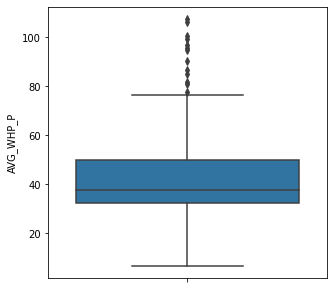

In [52]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'AVG_WHP_P', data=df_sin_nan)

In [53]:
Q1=df_sin_nan["AVG_WHP_P"].quantile(0.25)
Q3=df_sin_nan["AVG_WHP_P"].quantile(0.75)
IQR=Q3-Q1
lower_whisker_p1c6=Q1-0.8*IQR
upper_whisker_p1c6=Q3
print(lower_whisker_p1c6)
print(upper_whisker_p1c6)

18.096650000000004
49.93325


In [54]:
df_whpP=df_sin_nan[df_sin_nan["AVG_WHP_P"]<upper_whisker_p1c6]
df_whpP.shape

(328, 12)

In [55]:
df_final_whpP=df_whpP[df_whpP["AVG_WHP_P"]>lower_whisker_p1c6]
df_final_whpP.shape

(325, 12)

<AxesSubplot:ylabel='AVG_WHP_P'>

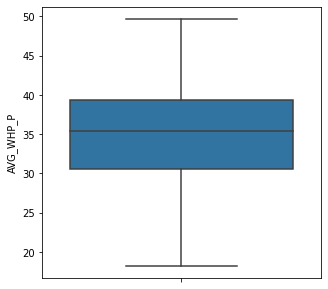

In [56]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'AVG_WHP_P', data=df_final_whpP)

In [57]:
df_modif_col61=df_sin_nan.AVG_WHP_P.where(df_sin_nan.AVG_WHP_P>lower_whisker_p1c6,df_final_whpP.AVG_WHP_P.mean())
df_modif_col6=df_modif_col61.where(df_modif_col61<upper_whisker_p1c6,df_final_whpP.AVG_WHP_P.mean())
df_modif_col61

0       96.580
1      107.362
2       99.187
3       94.601
4       89.988
        ...   
433     26.383
434     25.681
435     25.115
436     25.341
437     25.608
Name: AVG_WHP_P, Length: 438, dtype: float64

### limpieza de outliers de la columna AVG_WHT_P

<AxesSubplot:ylabel='AVG_WHT_P'>

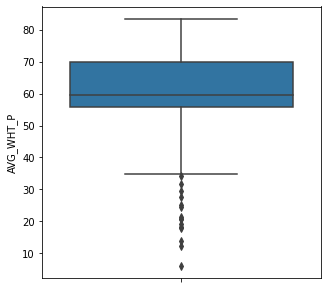

In [58]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'AVG_WHT_P', data=df_sin_nan)

In [59]:
Q1=df_sin_nan["AVG_WHT_P"].quantile(0.25)
Q3=df_sin_nan["AVG_WHT_P"].quantile(0.75)
IQR=Q3-Q1
lower_whisker_p1c7=Q1-1.4*IQR
upper_whisker_p1c7=Q3+1.4*IQR
print(lower_whisker_p1c7)
print(upper_whisker_p1c7)

35.831450000000004
89.7278


In [60]:
df_whtP=df_sin_nan[df_sin_nan["AVG_WHT_P"]>lower_whisker_p1c7]
df_whtP.shape

(421, 12)

<AxesSubplot:ylabel='AVG_WHT_P'>

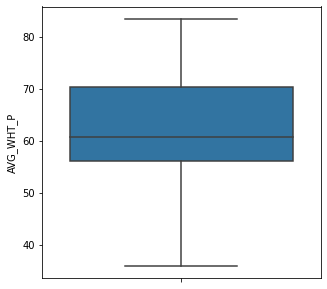

In [61]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'AVG_WHT_P', data=df_whtP)

In [62]:
df_modif_col7=df_sin_nan.AVG_WHT_P.where(df_sin_nan.AVG_WHT_P>lower_whisker_p1c7,df_whtP.AVG_WHT_P.mean())
df_modif_col7

0      62.420736
1      37.939000
2      60.757000
3      63.047000
4      64.547000
         ...    
433    69.559000
434    72.502000
435    71.750000
436    72.218000
437    66.568000
Name: AVG_WHT_P, Length: 438, dtype: float64

### limpieza de outliers de la columna DP_CHOKE_SIZE

<AxesSubplot:ylabel='DP_CHOKE_SIZE'>

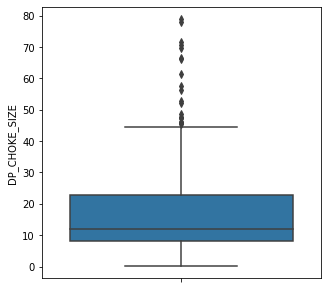

In [63]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'DP_CHOKE_SIZE', data=df_sin_nan)

In [64]:
Q1=df_sin_nan["DP_CHOKE_SIZE"].quantile(0.25)
Q3=df_sin_nan["DP_CHOKE_SIZE"].quantile(0.75)
IQR=Q3-Q1
lower_whisker_p1c8=Q1-0.19*IQR
upper_whisker_p1c8=Q3+0.19*IQR
print(lower_whisker_p1c8)
print(upper_whisker_p1c8)

5.233945
25.671055


In [65]:
df_choke_size=df_sin_nan[df_sin_nan["DP_CHOKE_SIZE"]<upper_whisker_p1c8]
df_choke_size.shape

(340, 12)

<AxesSubplot:ylabel='DP_CHOKE_SIZE'>

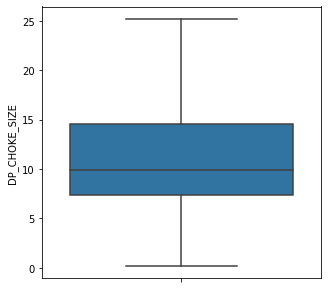

In [66]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'DP_CHOKE_SIZE', data=df_choke_size)

In [67]:
df_modif_col8=df_sin_nan.DP_CHOKE_SIZE.where(df_sin_nan.DP_CHOKE_SIZE<upper_whisker_p1c8,df_choke_size.DP_CHOKE_SIZE.mean())
df_modif_col8

0      11.025647
1      11.025647
2      11.025647
3      11.025647
4      11.025647
         ...    
433    10.681000
434     9.910000
435     9.197000
436     9.101000
437     9.830000
Name: DP_CHOKE_SIZE, Length: 438, dtype: float64

### limpieza de outliers de la columna BORE_OIL_VOL

<AxesSubplot:ylabel='BORE_OIL_VOL'>

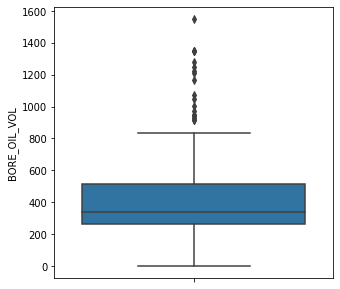

In [68]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'BORE_OIL_VOL', data=df_sin_nan)

In [69]:
Q1=df_sin_nan["BORE_OIL_VOL"].quantile(0.25)
Q3=df_sin_nan["BORE_OIL_VOL"].quantile(0.75)
IQR=Q3-Q1
lower_whisker_p1c9=Q1-1*IQR
upper_whisker_p1c9=Q3+1*IQR
print(lower_whisker_p1c9)
print(upper_whisker_p1c9)

5.409999999999968
769.1125000000002


In [70]:
df_oil_vol=df_sin_nan[df_sin_nan["BORE_OIL_VOL"]<upper_whisker_p1c9]
df_oil_vol.shape

(406, 12)

<AxesSubplot:ylabel='BORE_OIL_VOL'>

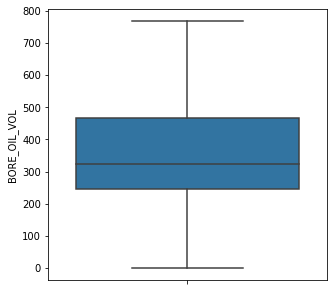

In [71]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'BORE_OIL_VOL', data=df_oil_vol)

In [72]:
df_modif_col9=df_sin_nan.BORE_OIL_VOL.where(df_sin_nan.BORE_OIL_VOL<upper_whisker_p1c9,df_oil_vol.BORE_OIL_VOL.mean())
df_modif_col9

0        0.000000
1      631.470000
2      359.481355
3      359.481355
4      359.481355
          ...    
433    284.720000
434    280.170000
435    281.930000
436    317.380000
437    208.000000
Name: BORE_OIL_VOL, Length: 438, dtype: float64

### limpieza de outliers de la columna BORE_GAS_VOL

<AxesSubplot:ylabel='BORE_GAS_VOL'>

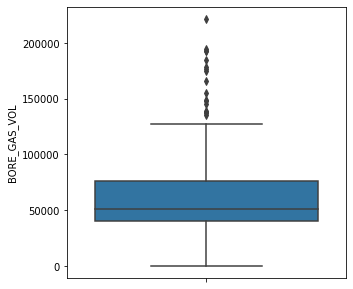

In [73]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'BORE_GAS_VOL', data=df_sin_nan)

In [74]:
Q1=df_sin_nan["BORE_GAS_VOL"].quantile(0.25)
Q3=df_sin_nan["BORE_GAS_VOL"].quantile(0.75)
IQR=Q3-Q1
lower_whisker_p1c10=Q1-1.1*IQR
upper_whisker_p1c10=Q3+1.4*IQR
print(lower_whisker_p1c10)
print(upper_whisker_p1c10)

324.46524999999383
126669.5565


In [75]:
df_gas_vol=df_sin_nan[df_sin_nan["BORE_GAS_VOL"]<upper_whisker_p1c10]
df_gas_vol.shape

(420, 12)

<AxesSubplot:ylabel='BORE_GAS_VOL'>

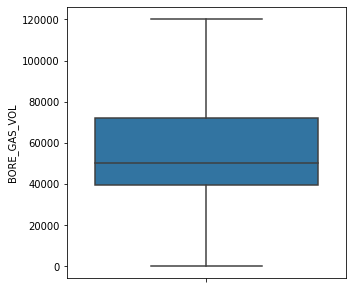

In [76]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'BORE_GAS_VOL', data=df_gas_vol)

In [77]:
df_modif_col10=df_sin_nan.BORE_GAS_VOL.where(df_sin_nan.BORE_GAS_VOL<upper_whisker_p1c10,df_gas_vol.BORE_GAS_VOL.mean())
df_modif_col10

0          0.000000
1      90439.090000
2      55918.232095
3      55918.232095
4      55918.232095
           ...     
433    46880.140000
434    45842.820000
435    45800.830000
436    51990.650000
437    34998.300000
Name: BORE_GAS_VOL, Length: 438, dtype: float64

### limpieza de outliers de la columna BORE_WAT_VOL

<AxesSubplot:ylabel='BORE_WAT_VOL'>

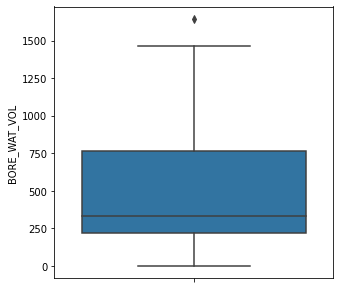

In [78]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'BORE_WAT_VOL', data=df_sin_nan)

In [79]:
Q1=df_sin_nan["BORE_WAT_VOL"].quantile(0.25)
Q3=df_sin_nan["BORE_WAT_VOL"].quantile(0.75)
IQR=Q3-Q1
lower_whisker_p1c11=Q1-1.1*IQR
upper_whisker_p1c11=Q3+1.4*IQR
print(lower_whisker_p1c11)
print(upper_whisker_p1c11)

-382.3537500000001
1528.7775000000001


In [80]:
df_wat_vol=df_sin_nan[df_sin_nan["BORE_WAT_VOL"]<upper_whisker_p1c11]
df_wat_vol.shape

(437, 12)

<AxesSubplot:ylabel='BORE_WAT_VOL'>

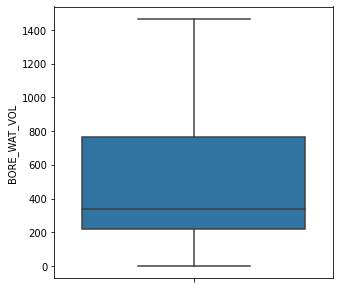

In [81]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y = 'BORE_WAT_VOL', data=df_wat_vol)

In [82]:
df_modif_col11=df_sin_nan.BORE_WAT_VOL.where(df_sin_nan.BORE_WAT_VOL<upper_whisker_p1c11,df_wat_vol.BORE_WAT_VOL.mean())
df_modif_col11

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
        ...  
433    766.23
434    748.25
435    797.30
436    792.76
437    542.39
Name: BORE_WAT_VOL, Length: 438, dtype: float64

#### CONSTRUCCIÓN DEL DF FINAL DEL POZO 1 CON LA DATA TRATADA

In [83]:
df_sin_nan

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,11.50,301.376,102.676,204.795,0.0,20.98975,96.580,19.197,69.776,0.00,0.00,0.00
1,24.00,289.421,106.353,182.059,0.0,43.34345,107.362,37.939,78.935,631.47,90439.09,0.00
2,24.00,270.240,107.644,171.053,0.0,47.16752,99.187,60.757,70.627,1166.46,165720.39,0.00
3,24.00,262.843,107.869,168.242,0.0,47.73231,94.601,63.047,66.049,1549.81,221707.31,0.00
4,24.00,255.527,107.971,165.539,0.0,48.53377,89.988,64.547,61.405,1248.70,178063.52,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
433,24.00,223.012,108.058,196.629,0.0,54.68774,26.383,69.559,10.681,284.72,46880.14,766.23
434,24.00,221.813,108.044,196.133,0.0,54.72411,25.681,72.502,9.910,280.17,45842.82,748.25
435,24.00,220.780,108.042,195.665,0.0,55.06795,25.115,71.750,9.197,281.93,45800.83,797.30
436,24.00,218.752,108.078,193.411,0.0,55.99813,25.341,72.218,9.101,317.38,51990.65,792.76


In [84]:
columna_p1c0=list(df_sin_nan.ON_STREAM_HRS)
columna_p1c1=list(df_modif_col1)
columna_p1c2=list(df_modif_col2)
columna_p1c3=list(df_modif_col3)
columna_p1c4=list(df_sin_nan.AVG_ANNULUS_PRESS)
columna_p1c5=list(df_modif_col5)
columna_p1c6=list(df_modif_col6)
columna_p1c7=list(df_modif_col7)
columna_p1c8=list(df_modif_col8)
columna_p1c9=list(df_modif_col9)
columna_p1c10=list(df_modif_col10)
columna_p1c11=list(df_modif_col11)
columna_dates=list(df_well_1.DATEPRD)

In [87]:
dicc_well_1={"DATEPRD":columna_dates,"ON_STREAM_HRS":columna_p1c0,"AVG_DOWNHOLE_PRESSURE":columna_p1c1,"AVG_DOWNHOLE_TEMPERATURE":columna_p1c2,"AVG_DP_TUBING":columna_p1c3,"AVG_ANNULUS_PRESS":columna_p1c4,"AVG_CHOKE_SIZE_P":columna_p1c5,"AVG_WHP_P":columna_p1c6,"AVG_WHT_P":columna_p1c7,"AVG_CHOKE_SIZE":columna_p1c8,"BORE_OIL_VOL":columna_p1c9,"BORE_GAS_VOL":columna_p1c10,"BORE_WAT_VOL":columna_p1c11}

In [88]:
df_new_well_1=pd.DataFrame(dicc_well_1)
df_new_well_1

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,AVG_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2014-04-21,11.50,223.935,108.124327,204.795,0.0,50.987051,35.27676,62.420736,11.025647,0.000000,0.000000,0.00
1,2014-04-22,24.00,223.935,108.124327,182.059,0.0,43.343450,35.27676,37.939000,11.025647,631.470000,90439.090000,0.00
2,2014-04-23,24.00,270.240,108.124327,171.053,0.0,47.167520,35.27676,60.757000,11.025647,359.481355,55918.232095,0.00
3,2014-04-24,24.00,262.843,107.869000,168.242,0.0,47.732310,35.27676,63.047000,11.025647,359.481355,55918.232095,0.00
4,2014-04-25,24.00,255.527,107.971000,165.539,0.0,48.533770,35.27676,64.547000,11.025647,359.481355,55918.232095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2016-04-02,24.00,223.012,108.058000,196.629,0.0,54.687740,26.38300,69.559000,10.681000,284.720000,46880.140000,766.23
434,2016-04-03,24.00,221.813,108.044000,196.133,0.0,54.724110,25.68100,72.502000,9.910000,280.170000,45842.820000,748.25
435,2016-04-04,24.00,220.780,108.042000,195.665,0.0,55.067950,25.11500,71.750000,9.197000,281.930000,45800.830000,797.30
436,2016-04-05,24.00,218.752,108.078000,193.411,0.0,55.998130,25.34100,72.218000,9.101000,317.380000,51990.650000,792.76


<AxesSubplot:ylabel='AVG_DOWNHOLE_PRESSURE'>

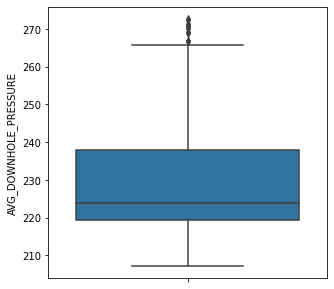

In [89]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y="AVG_DOWNHOLE_PRESSURE",data=df_new_well_1)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## POZO 2

In [90]:
df_well_2

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
762,2013-07-24,15/9-F-11,7.00,1.926,0.352,26.123,2.885,3.25655,28.049,18.195,18.851,17.85,2772.47,0.00,production,OP
763,2013-07-25,15/9-F-11,24.00,163.594,60.316,61.473,19.465,8.54913,102.121,36.967,72.955,725.00,108940.11,0.00,production,OP
764,2013-07-26,15/9-F-11,24.00,NaN,NaN,NaN,NaN,9.41919,NaN,NaN,NaN,891.48,131386.55,0.00,production,OP
765,2013-07-27,15/9-F-11,24.00,NaN,NaN,NaN,NaN,9.32210,NaN,NaN,NaN,886.42,134616.72,0.00,production,OP
766,2013-07-28,15/9-F-11,0.84,0.000,0.000,0.000,0.000,2.46422,0.000,0.000,0.000,56.01,9011.77,0.00,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,2016-09-13,15/9-F-11,24.00,253.399,105.267,226.401,22.564,100.00000,26.999,83.821,3.504,543.81,88042.16,3036.83,production,OP
1907,2016-09-14,15/9-F-11,24.00,253.210,105.272,226.255,22.720,100.00000,26.955,84.780,3.391,541.88,90188.97,2963.49,production,OP
1908,2016-09-15,15/9-F-11,24.00,252.939,105.274,226.037,22.581,100.00000,26.902,82.589,3.412,534.87,91890.07,2838.87,production,OP
1909,2016-09-16,15/9-F-11,24.00,252.892,105.276,226.022,22.571,100.00000,26.870,83.608,3.402,530.27,91579.73,2802.75,production,OP


In [91]:
parametros2=df_well_2.iloc[:,2:14]

In [92]:
datos2=imp.fit_transform(parametros2)
df_sin_nan2=pd.DataFrame(datos2, columns=encabezados)
df_sin_nan2.isnull().values.sum()

0

In [93]:
df_sin_nan2

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,7.00,1.926000,0.352000,26.123000,2.885000,3.25655,28.049000,18.1950,18.851000,17.85,2772.47,0.00
1,24.00,163.594000,60.316000,61.473000,19.465000,8.54913,102.121000,36.9670,72.955000,725.00,108940.11,0.00
2,24.00,235.070643,105.562517,183.138009,19.097765,9.41919,51.979349,70.0738,24.355319,891.48,131386.55,0.00
3,24.00,235.070643,105.562517,183.138009,19.097765,9.32210,51.979349,70.0738,24.355319,886.42,134616.72,0.00
4,0.84,0.000000,0.000000,0.000000,0.000000,2.46422,0.000000,0.0000,0.000000,56.01,9011.77,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1117,24.00,253.399000,105.267000,226.401000,22.564000,100.00000,26.999000,83.8210,3.504000,543.81,88042.16,3036.83
1118,24.00,253.210000,105.272000,226.255000,22.720000,100.00000,26.955000,84.7800,3.391000,541.88,90188.97,2963.49
1119,24.00,252.939000,105.274000,226.037000,22.581000,100.00000,26.902000,82.5890,3.412000,534.87,91890.07,2838.87
1120,24.00,252.892000,105.276000,226.022000,22.571000,100.00000,26.870000,83.6080,3.402000,530.27,91579.73,2802.75


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## POZO 3

In [94]:
df_well_3.isnull().values.sum()

31

In [95]:
parametros3=df_well_3.iloc[:,2:14]
datos3=imp.fit_transform(parametros3)
df_sin_nan3=pd.DataFrame(datos3,columns=encabezados)
df_sin_nan3.isnull().values.sum()

0

## POZO 4

In [96]:
df_well_4.isnull().values.sum()

517

In [98]:
parametros4=df_well_4.iloc[:,2:14]
datos4=imp.fit_transform(parametros4)
df_sin_nan4=pd.DataFrame(datos4,columns=encabezados)
df_sin_nan4.isnull().values.sum()

0

## POZO 5

In [99]:
df_well_5.isnull().values.sum()

0

## POZO 6

In [100]:
df_well_6

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
15482,2016-04-20,15/9-F-5,5.84,NaN,NaN,NaN,14.579,16.66558,12.232,21.798,1.506,17.75,3048.80,71.05,production,OP
15483,2016-04-21,15/9-F-5,24.00,NaN,NaN,NaN,25.364,80.41459,26.123,54.169,0.623,396.80,62250.56,334.07,production,OP
15484,2016-04-22,15/9-F-5,24.00,NaN,NaN,NaN,28.703,79.40019,26.003,57.744,0.559,358.12,53895.45,327.99,production,OP
15485,2016-04-23,15/9-F-5,24.00,NaN,NaN,NaN,29.454,79.45973,26.028,57.133,0.571,327.46,52669.63,288.67,production,OP
15486,2016-04-24,15/9-F-5,24.00,NaN,NaN,NaN,20.473,79.45728,25.681,58.343,0.499,319.31,51560.99,214.09,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606,2016-08-22,15/9-F-5,24.00,NaN,NaN,NaN,24.998,100.00000,23.650,57.480,0.120,371.33,57934.84,90.61,production,OP
15607,2016-08-23,15/9-F-5,24.00,NaN,NaN,NaN,25.074,100.00000,23.728,56.862,0.190,378.55,59119.57,90.11,production,OP
15608,2016-08-24,15/9-F-5,24.00,NaN,NaN,NaN,24.934,100.00000,23.703,56.249,0.168,376.86,58632.31,91.32,production,OP
15609,2016-08-25,15/9-F-5,24.00,NaN,NaN,NaN,24.931,100.00000,23.642,57.884,0.102,377.44,59337.43,91.38,production,OP


In [101]:
df_well_6.isnull().values.sum()

387

In [102]:
encabezados_new=["ON_STREAM_HRS","AVG_ANNULUS_PRESS","AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","DP_CHOKE_SIZE","BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL"]

In [103]:
parametros6=df_well_6.iloc[:,2:14]
datos6=imp.fit_transform(parametros6)
df_sin_nan6=pd.DataFrame(datos6,columns=encabezados_new)
df_sin_nan6.isnull().values.sum()

0

In [104]:
df_sin_nan6

,ON_STREAM_HRS,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,5.84,14.579,16.66558,12.232,21.798,1.506,17.75,3048.80,71.05
1,24.00,25.364,80.41459,26.123,54.169,0.623,396.80,62250.56,334.07
2,24.00,28.703,79.40019,26.003,57.744,0.559,358.12,53895.45,327.99
3,24.00,29.454,79.45973,26.028,57.133,0.571,327.46,52669.63,288.67
4,24.00,20.473,79.45728,25.681,58.343,0.499,319.31,51560.99,214.09
...,...,...,...,...,...,...,...,...,...
124,24.00,24.998,100.00000,23.650,57.480,0.120,371.33,57934.84,90.61
125,24.00,25.074,100.00000,23.728,56.862,0.190,378.55,59119.57,90.11
126,24.00,24.934,100.00000,23.703,56.249,0.168,376.86,58632.31,91.32
127,24.00,24.931,100.00000,23.642,57.884,0.102,377.44,59337.43,91.38


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# POZOS INJECTORES

In [105]:
df_injectores=data_tratada[data_tratada.FLOW_KIND=="injection"]

In [106]:
names_inj = pd.unique(df_injectores["NPD_WELL_BORE_NAME"])
list(names_inj)

['15/9-F-4', '15/9-F-5']

In [107]:
del df_injectores["AVG_DOWNHOLE_PRESSURE"]
del df_injectores["AVG_DOWNHOLE_TEMPERATURE"]
del df_injectores["AVG_DP_TUBING"]
del df_injectores["AVG_ANNULUS_PRESS"]
del df_injectores["AVG_CHOKE_SIZE_P"]
del df_injectores["AVG_WHP_P"]
del df_injectores["DP_CHOKE_SIZE"]
del df_injectores["BORE_OIL_VOL"]
del df_injectores["BORE_GAS_VOL"]
del df_injectores["BORE_WAT_VOL"]

In [108]:
del df_injectores["AVG_WHT_P"]

In [109]:
df_well_7=df_injectores[df_injectores.NPD_WELL_BORE_NAME=="15/9-F-4"]
df_well_8=df_injectores[df_injectores.NPD_WELL_BORE_NAME=="15/9-F-5"]

In [110]:
lista_df_well_inj=[df_well_7,df_well_8]
for name in lista_df_well_inj:
    nulos=name.isnull().values.sum()
    print(nulos)

0
0


## POZO 7

In [111]:
df_well_7

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
9236,2008-04-23,15/9-F-4,10.00,166.08,injection,WI
9237,2008-04-24,15/9-F-4,24.00,3565.07,injection,WI
9238,2008-04-25,15/9-F-4,24.00,6916.92,injection,WI
9239,2008-04-26,15/9-F-4,18.65,6617.82,injection,WI
9240,2008-04-27,15/9-F-4,15.96,4507.00,injection,WI
...,...,...,...,...,...,...
12300,2016-09-12,15/9-F-4,10.94,1971.78,injection,WI
12302,2016-09-14,15/9-F-4,9.56,1810.68,injection,WI
12303,2016-09-15,15/9-F-4,24.00,4469.38,injection,WI
12304,2016-09-16,15/9-F-4,24.00,4474.81,injection,WI


In [112]:
df_well_7.isnull().values.sum()

0

### limpieza de outliers de la columna BORE_WI_VOL

<AxesSubplot:ylabel='BORE_WI_VOL'>

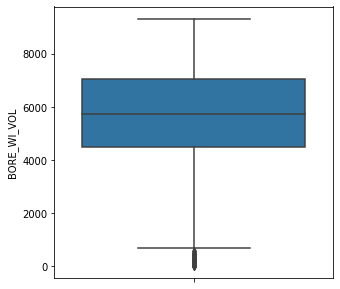

In [113]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y="BORE_WI_VOL",data=df_well_7)

In [114]:
Q1=df_well_7["BORE_WI_VOL"].quantile(0.25)
Q3=df_well_7["BORE_WI_VOL"].quantile(0.75)
IQR=Q3-Q1
lower_whisker_p7=Q1-1.5*IQR
upper_whisker_p7=Q3+1.5*IQR
print(lower_whisker_p7)
print(upper_whisker_p7)

621.1474999999996
10922.6675


In [115]:
df_wi_p7=df_well_7[df_well_7["BORE_WI_VOL"]>lower_whisker_p7]
df_wi_p7.shape

(2803, 6)

<AxesSubplot:ylabel='BORE_WI_VOL'>

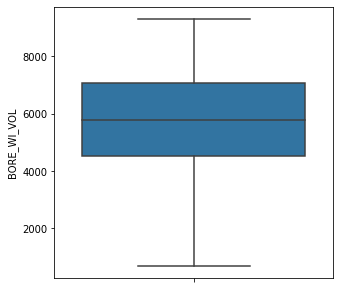

In [116]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y="BORE_WI_VOL",data=df_wi_p7)

In [117]:
df_modif_pozo7=df_well_7.BORE_WI_VOL.where(df_well_7.BORE_WI_VOL>lower_whisker_p7,df_wi_p7.BORE_WI_VOL.mean())
df_modif_pozo7

9236     5789.616882
9237     3565.070000
9238     6916.920000
9239     6617.820000
9240     4507.000000
            ...     
12300    1971.780000
12302    1810.680000
12303    4469.380000
12304    4474.810000
12305    1419.010000
Name: BORE_WI_VOL, Length: 2830, dtype: float64

#### CONSTRUCCIÓN DEL DF FINAL DEL POZO 7 CON LA DATA TRATADA

In [118]:
columna_p7c0=list(df_well_7.DATEPRD)
columna_p7c1=list(df_modif_pozo7)

In [119]:
dicc_well_7={"DATEPRD":columna_p7c0,"BORE_WI_VOL_F4":columna_p7c1}

In [120]:
df_new_well_7=pd.DataFrame(dicc_well_7)
df_new_well_7

,DATEPRD,BORE_WI_VOL_F4
0,2008-04-23,5789.616882
1,2008-04-24,3565.070000
2,2008-04-25,6916.920000
3,2008-04-26,6617.820000
4,2008-04-27,4507.000000
...,...,...
2825,2016-09-12,1971.780000
2826,2016-09-14,1810.680000
2827,2016-09-15,4469.380000
2828,2016-09-16,4474.810000


In [121]:
list_w7=[]

In [122]:
for i in range(len(columna_p7c0)):
    clave=columna_p7c0[i]
    valor=columna_p7c1[i]
    list_w7.append({clave:valor})

## POZO 8

In [123]:
df_well_8

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
12688,2008-08-26,15/9-F-5,6.50,1300.07,injection,WI
12689,2008-08-27,15/9-F-5,9.00,1718.00,injection,WI
12690,2008-08-28,15/9-F-5,18.21,3092.00,injection,WI
12691,2008-08-29,15/9-F-5,16.54,2224.00,injection,WI
12692,2008-08-30,15/9-F-5,24.00,3206.86,injection,WI
...,...,...,...,...,...,...
15464,2016-04-02,15/9-F-5,6.01,1182.63,injection,WI
15465,2016-04-03,15/9-F-5,24.00,4395.17,injection,WI
15466,2016-04-04,15/9-F-5,18.58,3437.60,injection,WI
15467,2016-04-05,15/9-F-5,16.50,3972.17,injection,WI


In [124]:
df_well_8.isnull().values.sum()

0

### limpieza de outliers de la columna BORE_WI_VOL

<AxesSubplot:ylabel='BORE_WI_VOL'>

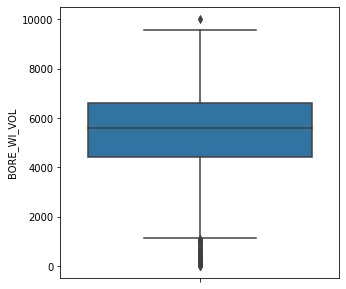

In [125]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y="BORE_WI_VOL",data=df_well_8)

In [126]:
Q1=df_well_8["BORE_WI_VOL"].quantile(0.25)
Q3=df_well_8["BORE_WI_VOL"].quantile(0.75)
IQR=Q3-Q1
lower_whisker_p8=Q1-1.4*IQR
upper_whisker_p8=Q3+1.5*IQR
print(lower_whisker_p8)
print(upper_whisker_p8)

1345.9780000000028
9912.444999999998


In [127]:
df_wi_p81=df_well_8[df_well_8["BORE_WI_VOL"]>lower_whisker_p8]
df_wi_p8=df_wi_p81[df_wi_p81["BORE_WI_VOL"]<upper_whisker_p8]
df_wi_p8.shape

(2494, 6)

<AxesSubplot:ylabel='BORE_WI_VOL'>

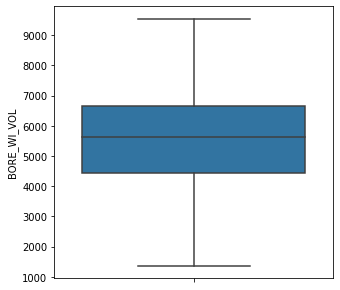

In [128]:
figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(y="BORE_WI_VOL",data=df_wi_p8)

In [129]:
df_modif_pozo81=df_well_8.BORE_WI_VOL.where(df_well_8.BORE_WI_VOL>lower_whisker_p8,df_wi_p8.BORE_WI_VOL.mean())
df_modif_pozo8=df_modif_pozo81.where(df_modif_pozo81<upper_whisker_p8,df_wi_p8.BORE_WI_VOL.mean())
df_modif_pozo8

12688    5629.787566
12689    1718.000000
12690    3092.000000
12691    2224.000000
12692    3206.860000
            ...     
15464    5629.787566
15465    4395.170000
15466    3437.600000
15467    3972.170000
15468    2825.430000
Name: BORE_WI_VOL, Length: 2547, dtype: float64

#### CONSTRUCCIÓN DEL DF FINAL DEL POZO 8 CON LA DATA TRATADA

In [130]:
columna_p8c0=list(df_well_8.DATEPRD)
columna_p8c1=list(df_modif_pozo8)

In [131]:
dicc_well_8={"DATEPRD":columna_p8c0,"BORE_WI_VOL_F5":columna_p8c1}

In [132]:
df_new_well_8=pd.DataFrame(dicc_well_8)
df_new_well_8

,DATEPRD,BORE_WI_VOL_F5
0,2008-08-26,5629.787566
1,2008-08-27,1718.000000
2,2008-08-28,3092.000000
3,2008-08-29,2224.000000
4,2008-08-30,3206.860000
...,...,...
2542,2016-04-02,5629.787566
2543,2016-04-03,4395.170000
2544,2016-04-04,3437.600000
2545,2016-04-05,3972.170000


In [133]:
list_w8=[]

In [134]:
for i in range(len(columna_p8c0)):
    clave=columna_p8c0[i]
    valor=columna_p8c1[i]
    list_w8.append({clave:valor})

## POZO 1 df completo

In [135]:
columna_wi_F4=[]
columna_wi_F5=[]

In [136]:
for x in range(len(list(df_new_well_1.DATEPRD))):
    fechas=list(df_new_well_1.DATEPRD)
    fecha_interes=fechas[x]
    vol1=0
    vol2=0
    for j in range(len(list_w7)):
        diccj=list_w7[j]
        clavej=list(diccj.keys())[0]
        valorj=list(diccj.values())[0]
        if fecha_interes==clavej:
            vol1=valorj
    for k in range(len(list_w8)):
        dicck=list_w8[k]
        clavek=list(dicck.keys())[0]
        valork=list(dicck.values())[0]
        if fecha_interes==clavek:
            vol2=valork    
    columna_wi_F4.append(vol1)
    columna_wi_F5.append(vol2)
        

In [137]:
df_final_w1=df_new_well_1.assign(WI_F4=columna_wi_F4, WI_F5=columna_wi_F5)

In [138]:
df_final_w1

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,AVG_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,WI_F4,WI_F5
0,2014-04-21,11.50,223.935,108.124327,204.795,0.0,50.987051,35.27676,62.420736,11.025647,0.000000,0.000000,0.00,5662.27,4768.820000
1,2014-04-22,24.00,223.935,108.124327,182.059,0.0,43.343450,35.27676,37.939000,11.025647,631.470000,90439.090000,0.00,5789.49,4247.450000
2,2014-04-23,24.00,270.240,108.124327,171.053,0.0,47.167520,35.27676,60.757000,11.025647,359.481355,55918.232095,0.00,6465.92,5060.800000
3,2014-04-24,24.00,262.843,107.869000,168.242,0.0,47.732310,35.27676,63.047000,11.025647,359.481355,55918.232095,0.00,6158.80,5236.800000
4,2014-04-25,24.00,255.527,107.971000,165.539,0.0,48.533770,35.27676,64.547000,11.025647,359.481355,55918.232095,0.00,6412.50,5423.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2016-04-02,24.00,223.012,108.058000,196.629,0.0,54.687740,26.38300,69.559000,10.681000,284.720000,46880.140000,766.23,6429.66,5629.787566
434,2016-04-03,24.00,221.813,108.044000,196.133,0.0,54.724110,25.68100,72.502000,9.910000,280.170000,45842.820000,748.25,4598.72,4395.170000
435,2016-04-04,24.00,220.780,108.042000,195.665,0.0,55.067950,25.11500,71.750000,9.197000,281.930000,45800.830000,797.30,5137.82,3437.600000
436,2016-04-05,24.00,218.752,108.078000,193.411,0.0,55.998130,25.34100,72.218000,9.101000,317.380000,51990.650000,792.76,6521.45,3972.170000


Escalammiento de los datos

In [139]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df_prescaled=df_final_w1.drop("DATEPRD",axis=1)
scaler_all_data=MinMaxScaler()
data_scaled = scaler_all_data.fit_transform(df_prescaled)
df_data_scaled=pd.DataFrame(data_scaled)
df_data_scaled.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.443299,0.255315,0.523742,0.523227,0.0,0.497125,0.54229,0.558217,0.433145,0.000000,0.000000,0.0,0.652247,0.592683
1,0.958763,0.255315,0.523742,0.285828,0.0,0.087381,0.54229,0.043170,0.433145,0.821147,0.751729,0.0,0.666902,0.527886
2,0.958763,0.962564,0.523742,0.170908,0.0,0.292374,0.54229,0.523215,0.433145,0.467460,0.464792,0.0,0.744821,0.628972
3,0.958763,0.849585,0.201765,0.141556,0.0,0.322651,0.54229,0.571393,0.433145,0.467460,0.464792,0.0,0.709444,0.650845
4,0.958763,0.737842,0.330391,0.113333,0.0,0.365614,0.54229,0.602950,0.433145,0.467460,0.464792,0.0,0.738668,0.674062


In [140]:
df_final_w1.corr()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,AVG_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,WI_F4,WI_F5
ON_STREAM_HRS,1.000000,-0.018865,0.029027,-0.221267,NaN,0.021785,0.154002,0.101817,0.113634,0.468937,0.469915,0.264188,0.211874,0.234530
AVG_DOWNHOLE_PRESSURE,-0.018865,1.000000,-0.344982,0.658318,NaN,0.254818,-0.204288,0.286255,0.061813,-0.418949,-0.389032,0.440489,-0.353744,-0.141182
AVG_DOWNHOLE_TEMPERATURE,0.029027,-0.344982,1.000000,0.018461,NaN,0.170654,0.250661,0.035862,-0.146118,-0.101082,-0.141860,0.080000,0.333041,0.057962
AVG_DP_TUBING,-0.221267,0.658318,0.018461,1.000000,NaN,0.559297,-0.344301,0.441127,-0.100080,-0.701081,-0.722931,0.679654,-0.316462,-0.131711
AVG_ANNULUS_PRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVG_CHOKE_SIZE_P,0.021785,0.254818,0.170654,0.559297,NaN,1.000000,-0.368126,0.606461,-0.310533,-0.339547,-0.378117,0.674464,-0.231805,-0.081149
AVG_WHP_P,0.154002,-0.204288,0.250661,-0.344301,NaN,-0.368126,1.000000,-0.388180,0.489251,0.279301,0.256354,-0.359314,0.254099,-0.063314
AVG_WHT_P,0.101817,0.286255,0.035862,0.441127,NaN,0.606461,-0.388180,1.000000,-0.216706,-0.156963,-0.184128,0.742655,-0.246733,-0.085020
AVG_CHOKE_SIZE,0.113634,0.061813,-0.146118,-0.100080,NaN,-0.310533,0.489251,-0.216706,1.000000,0.107322,0.105227,-0.123510,0.041621,0.035103
BORE_OIL_VOL,0.468937,-0.418949,-0.101082,-0.701081,NaN,-0.339547,0.279301,-0.156963,0.107322,1.000000,0.923341,-0.225518,0.153373,0.162524


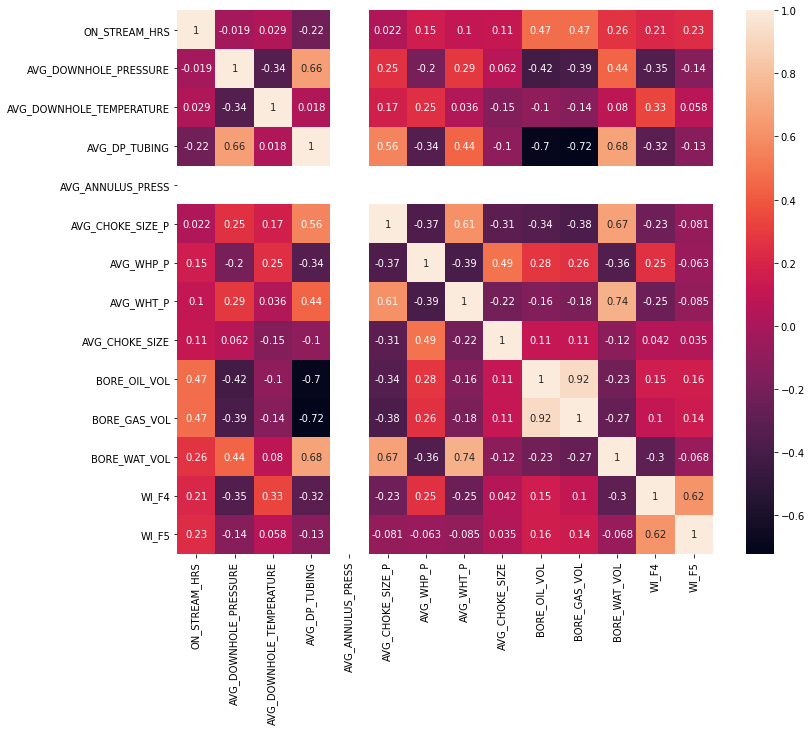

In [141]:
plt.figure(figsize=(12,10))
sns.heatmap(df_final_w1.corr(),annot=True)
plt.savefig('heatmap.png', dpi=300)

# APLICACIÓN DE MODELOS

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X = df_final_w1.filter(["ON_STREAM_HRS", 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', "WI_F4","WI_F5"])
Y = df_final_w1[['BORE_OIL_VOL', 'BORE_GAS_VOL']]
print('Features shape:', X.shape)
print('Target shape', Y.shape)

Features shape: (438, 7)
Target shape (438, 2)


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle = True)


Time=df_final_w1.iloc[:,0]
Time_train, Time_test = train_test_split(Time, test_size=0.3, random_state=42)

## ARIMA

In [ ]:
# pip install pmdarima

In [146]:
from statsmodels.graphics.tsaplots import plot_acf

In [147]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [148]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

In [149]:
from statsmodels.tsa.arima_model import ARIMA

In [150]:
import warnings
warnings.filterwarnings("ignore")

In [151]:
well1_arima=df_final_w1.set_index("DATEPRD")
well1_arima


,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,AVG_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,WI_F4,WI_F5
DATEPRD,,,,,,,,,,,,,,
2014-04-21,11.50,223.935,108.124327,204.795,0.0,50.987051,35.27676,62.420736,11.025647,0.000000,0.000000,0.00,5662.27,4768.820000
2014-04-22,24.00,223.935,108.124327,182.059,0.0,43.343450,35.27676,37.939000,11.025647,631.470000,90439.090000,0.00,5789.49,4247.450000
2014-04-23,24.00,270.240,108.124327,171.053,0.0,47.167520,35.27676,60.757000,11.025647,359.481355,55918.232095,0.00,6465.92,5060.800000
2014-04-24,24.00,262.843,107.869000,168.242,0.0,47.732310,35.27676,63.047000,11.025647,359.481355,55918.232095,0.00,6158.80,5236.800000
2014-04-25,24.00,255.527,107.971000,165.539,0.0,48.533770,35.27676,64.547000,11.025647,359.481355,55918.232095,0.00,6412.50,5423.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-02,24.00,223.012,108.058000,196.629,0.0,54.687740,26.38300,69.559000,10.681000,284.720000,46880.140000,766.23,6429.66,5629.787566
2016-04-03,24.00,221.813,108.044000,196.133,0.0,54.724110,25.68100,72.502000,9.910000,280.170000,45842.820000,748.25,4598.72,4395.170000
2016-04-04,24.00,220.780,108.042000,195.665,0.0,55.067950,25.11500,71.750000,9.197000,281.930000,45800.830000,797.30,5137.82,3437.600000


<AxesSubplot:xlabel='DATEPRD'>

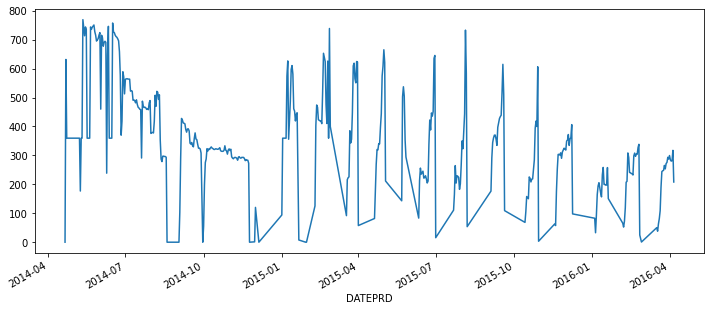

In [152]:
well1_arima["BORE_OIL_VOL"].plot(figsize=(12,5))

### Check for stationarity

In [153]:
from statsmodels.tsa.stattools import adfuller

In [154]:
def ad_test(dataset):
    dftest=adfuller(dataset, autolag="AIC")
    print("1. ADF : ",dftest[0])
    print("2. P-value :",dftest[1])
    print("3. Num Of Lags :",dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",dftest[3])
    print("5. Critical values: ")
    for key,val in dftest[4].items():
        print("\t",key,": ",val)

In [155]:
ad_test(well1_arima["BORE_OIL_VOL"])

1. ADF :  -2.14924601075096
2. P-value : 0.2251788108782981
3. Num Of Lags : 17
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 420
5. Critical values: 
	 1% :  -3.4460159927788574
	 5% :  -2.868446209372638
	 10% :  -2.570448781179138


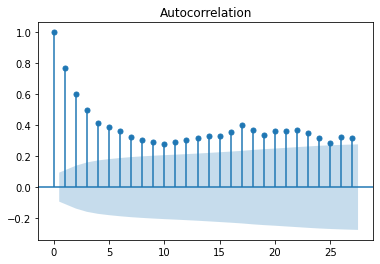

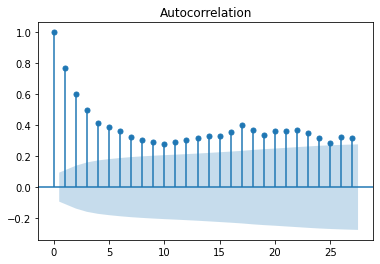

In [156]:
plot_acf(well1_arima["BORE_OIL_VOL"])

In [157]:
well1_prod_diff=well1_arima["BORE_OIL_VOL"].diff(periods=1)
#integrated of order 1, denoted by d (for diff), one of the paramethers on ARIMA model
well1_prod_diff=well1_prod_diff[1:]

<AxesSubplot:xlabel='DATEPRD'>

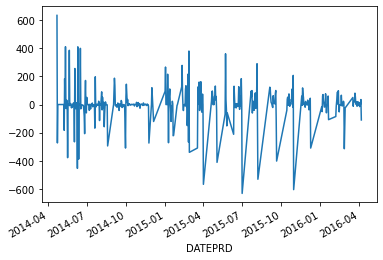

In [158]:
well1_prod_diff.plot()

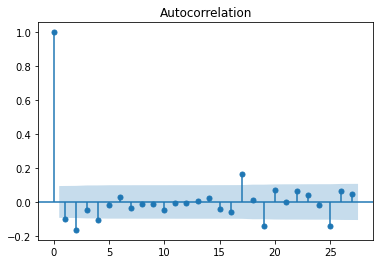

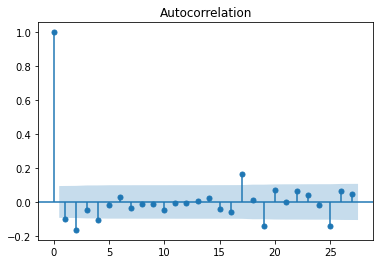

In [159]:
plot_acf(well1_prod_diff)

In [160]:
well1_prod_diff

DATEPRD
2014-04-22    631.470000
2014-04-23   -271.988645
2014-04-24      0.000000
2014-04-25      0.000000
2014-04-26      0.000000
                 ...    
2016-04-02    -14.770000
2016-04-03     -4.550000
2016-04-04      1.760000
2016-04-05     35.450000
2016-04-06   -109.380000
Name: BORE_OIL_VOL, Length: 437, dtype: float64

In [161]:
from pmdarima import auto_arima

In [162]:
stepwise_fit=auto_arima(well1_prod_diff, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5359.187, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5416.377, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5413.639, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5410.632, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5414.384, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5358.233, Time=0.93 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5384.464, Time=0.75 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5358.681, Time=0.44 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=5359.955, Time=1.70 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=5372.395, Time=1.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5358.425, Time=0.66 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=5361.173, Time=2.83 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5356.592, Time=0.60 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5382.465, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  437
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -2674.296
Date:                Mon, 26 Jul 2021   AIC                           5356.592
Time:                        11:15:11   BIC                           5372.912
Sample:                             0   HQIC                          5363.032
                                - 437                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5673      0.065      8.701      0.000       0.440       0.695
ma.L1         -0.8120      0.072    -11.333      0.000      -0.952      -0.672
ma.L2         -0.1292      0.057     -2.255      0.024      -0.241      -0.017
sigma2      1.208e+04    490.957     24.598      0.000    1.11e+04     1.3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1018.30
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.60
Prob(H) (two-sided):                  0.18   Kurtosis:                        10.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [163]:
print(well1_arima.shape)
train=well1_arima.iloc[:-88] #80%
test=well1_arima.iloc[-88:] #20%
print(train.shape,test.shape)

(438, 14)
(350, 14) (88, 14)


### Train the model

In [164]:
model=ARIMA(train["BORE_OIL_VOL"],order=(1,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           BORE_OIL_VOL   No. Observations:                  350
Model:                     ARMA(1, 2)   Log Likelihood               -2158.689
Method:                       css-mle   S.D. of innovations            115.292
Date:                Mon, 26 Jul 2021   AIC                           4327.378
Time:                        11:15:48   BIC                           4346.668
Sample:                             0   HQIC                          4335.056
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                384.8274     28.454     13.524      0.000     329.058     440.597
ar.L1.BORE_OIL_VOL     0.8406      0.057     14.718      0.000       0.729       0.953
ma.L1.BORE_OIL_VOL    -0.0577      0.086     -0.675      0.499      -0.225       0.110
ma.L2.BORE_OIL_VOL    -0.1981      0.084     -2.346      0.019      -0.364      -0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1896           +0.0000j            1.1896            0.0000
MA.1            2.1059           +0.0000j            2.1059            0.0000
MA.2           -2.3974           +0.0000j            2.3974            0.5000
-----------------------------------------------------------------------------
"""

### Make Predictions on Test Set

In [165]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ="levels")
pred.index=well1_arima.index[start:end+1]
print(pred)

DATEPRD
2015-10-25    280.764930
2015-10-26    297.316951
2015-10-27    311.263496
2015-10-28    322.987380
2015-10-29    332.842829
                 ...    
2016-04-02    384.827368
2016-04-03    384.827377
2016-04-04    384.827385
2016-04-05    384.827391
2016-04-06    384.827397
Length: 88, dtype: float64


<AxesSubplot:xlabel='DATEPRD'>

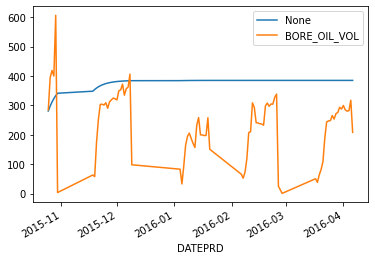

In [166]:
pred.plot(legend=True)
test["BORE_OIL_VOL"].plot(legend=True)

In [167]:
rmse=sqrt(mean_squared_error(pred, test["BORE_OIL_VOL"]))
print(rmse)

184.40839469400538


In [168]:
model2=ARIMA(well1_arima["BORE_OIL_VOL"],order=(1,0,2))
model2=model2.fit()
well1_arima.tail()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,AVG_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,WI_F4,WI_F5
DATEPRD,,,,,,,,,,,,,,
2016-04-02,24.00,223.012,108.058,196.629,0.0,54.68774,26.383,69.559,10.681,284.72,46880.14,766.23,6429.66,5629.787566
2016-04-03,24.00,221.813,108.044,196.133,0.0,54.72411,25.681,72.502,9.910,280.17,45842.82,748.25,4598.72,4395.170000
2016-04-04,24.00,220.780,108.042,195.665,0.0,55.06795,25.115,71.750,9.197,281.93,45800.83,797.30,5137.82,3437.600000
2016-04-05,24.00,218.752,108.078,193.411,0.0,55.99813,25.341,72.218,9.101,317.38,51990.65,792.76,6521.45,3972.170000
2016-04-06,20.82,218.438,107.857,192.830,0.0,45.14344,25.608,66.568,9.830,208.00,34998.30,542.39,4443.90,2825.430000


### For Future Dates

In [169]:
index_future_dates=pd.date_range(start="2016-04-06",end="2017-04-06")
print(index_future_dates)

DatetimeIndex(['2016-04-06', '2016-04-07', '2016-04-08', '2016-04-09',
               '2016-04-10', '2016-04-11', '2016-04-12', '2016-04-13',
               '2016-04-14', '2016-04-15',
               ...
               '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31',
               '2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06'],
              dtype='datetime64[ns]', length=366, freq='D')


In [170]:
pred=model2.predict(start=len(well1_arima),end=len(well1_arima)+365,typ="levels").rename("ARIMA Predictions")
print(pred)

438    234.849769
439    271.566316
440    283.377149
441    293.507073
442    302.195314
          ...    
799    354.554621
800    354.554621
801    354.554621
802    354.554621
803    354.554621
Name: ARIMA Predictions, Length: 366, dtype: float64


In [171]:
pred.index=index_future_dates
print(pred)

2016-04-06    234.849769
2016-04-07    271.566316
2016-04-08    283.377149
2016-04-09    293.507073
2016-04-10    302.195314
                 ...    
2017-04-02    354.554621
2017-04-03    354.554621
2017-04-04    354.554621
2017-04-05    354.554621
2017-04-06    354.554621
Freq: D, Name: ARIMA Predictions, Length: 366, dtype: float64


<AxesSubplot:>

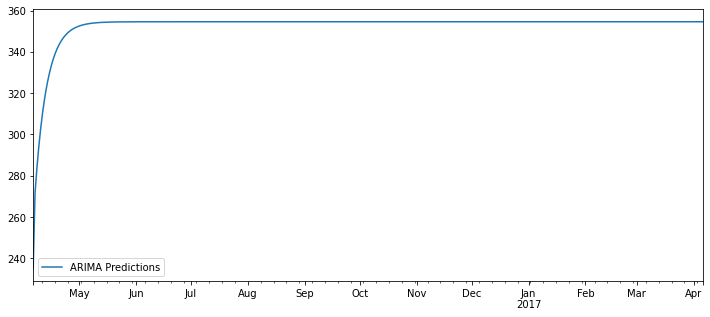

In [172]:
pred.plot(figsize=(12,5),legend=True)

## Random Forest

In [173]:
from sklearn.ensemble import RandomForestRegressor

In [174]:
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train) 
predictions_rf = rf.predict(X_test)

# Metrics
print('Model score:',              round(rf.score(X_test, y_test),2))
print('Mean absolute error:',      round(mean_absolute_error(y_test, predictions_rf),2))
print('Root mean squared error:',  round(sqrt(mean_squared_error(y_test, predictions_rf)),2))
print('R2:',                       round(r2_score(y_test, predictions_rf),2))

Model score: 0.8
Mean absolute error: 3616.44
Root mean squared error: 8137.15
R2: 0.8


In [175]:
# List of features
feature_list = list(X_train.columns)

# Get numerical feature importances (Gini importance)
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AVG_DP_TUBING                  Importance: 0.6
Variable: ON_STREAM_HRS                  Importance: 0.13
Variable: AVG_DOWNHOLE_PRESSURE          Importance: 0.08
Variable: WI_F4                          Importance: 0.07
Variable: AVG_WHT_P                      Importance: 0.05
Variable: WI_F5                          Importance: 0.05
Variable: AVG_WHP_P                      Importance: 0.02


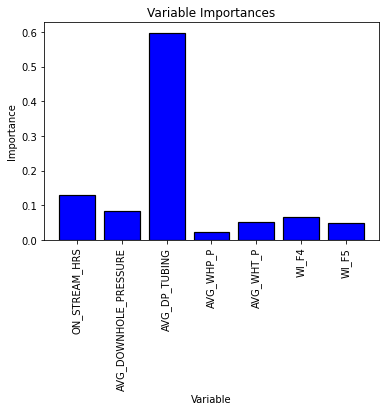

In [176]:
# list of x locations for plotting
X_testues = list(range(len(importances)))

# Make a bar chart
plt.bar(X_testues, importances, orientation = 'vertical', color = 'b', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(X_testues, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [177]:
rf.fit(X_train, y_train);

In [178]:
predictions_import = rf.predict(X_test)

In [179]:
from pprint import pprint

In [180]:
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [181]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [182]:
# Definition of specific parameters for Random forest 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 30, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [4, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 3, 4, 5, 10],
 'n_estimators': [2,
                  107,
                  212,
                  317,
                  422,
                  527,
                  632,
                  738,
                  843,
                  948,
                  1053,
                  1158,
                  1263,
                  1369,
                  1474,
                  1579,
                  1684,
                  1789,
                  1894,
                  2000]}


In [ ]:
rf = RandomForestRegressor(random_state = 42)

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across different combinations.
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter = 15, scoring='neg_mean_absolute_error',  cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [184]:
# Obtaining the best parameters
rf_random.best_params_

{'n_estimators': 1894,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

### Evaluación de los parámetros

In [185]:
best_random = rf_random.best_estimator_.fit(X_train, y_train)
predictions_best_random_test = best_random.predict(X_test)
predictions_best_random_train = best_random.predict(X_train)

print('Model score:', round(best_random.score(X_test, y_test),2))
print('Mean absolute error:', round(mean_absolute_error(y_test, predictions_best_random_test),2))
print('Root mean squared error:', round(sqrt(mean_squared_error(y_test, predictions_best_random_test)),2))
print('R2:', round(r2_score(y_test, predictions_best_random_test),2))

r2_rf=r2_score(y_test, predictions_best_random_test)
Mean_absolute_error_rf=mean_absolute_error(y_test, predictions_best_random_test)
Root_mean_squared_error_rf=sqrt(mean_squared_error(y_test, predictions_best_random_test))

Model score: 0.8
Mean absolute error: 3649.7
Root mean squared error: 8376.82
R2: 0.8


In [186]:
result_df = pd.DataFrame({'BORE_OIL_VOL': [y_test], 'Predicted': [predictions_best_random_test]})

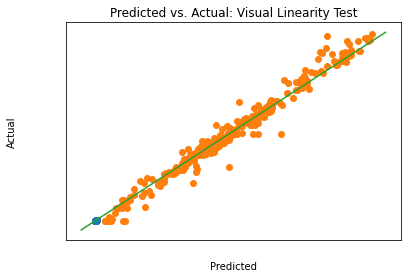

In [187]:
from scipy import stats
import statsmodels as sm

y = y_train
X_train_np = np.array(X_train)
y_np = np.array(y)

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

#predict y values for training data
y_hat = predictions_best_random_train 

#plot predicted vs actual
plt.plot(y_hat,y_np,'o')
plt.xlabel('Predicted')#,color='white')
plt.ylabel('Actual')#,color='white')
plt.title('Predicted vs. Actual: Visual Linearity Test')#,color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
abline(1,0)
plt.show()